In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import cvxpy as cp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gmean

%matplotlib inline
plt.style.use('seaborn')
sns.set_palette("husl")

## Step 1: Fetch Real Stock Data
def fetch_stock_data(tickers, start_date, end_date):
    """
    Download historical stock data from Yahoo Finance
    """
    data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)
    return data

# Example stocks (replace with your preferred stocks)
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'META', 'TSLA', 'JPM', 'GS', 'WMT', 'NFLX']
# tickers = ['GOOG', 'AAPL', 'TSLA', 'MSFT']
start_date = '2021-01-01'
end_date = '2025-12-31'

print("Downloading stock data...")
price_data = fetch_stock_data(tickers, start_date, end_date)
price_data.head()

[*********************100%***********************]  10 of 10 completed


Price        Adj Close                                                 \
Ticker            AAPL        AMZN       GOOG          GS         JPM   
Date                                                                    
2021-01-04  126.405235  159.331497  86.004646  238.937683  112.308495   
2021-01-05  127.968063  160.925507  86.635651  244.284424  112.919617   
2021-01-06  123.660477  156.919006  86.355484  257.466644  118.221817   
2021-01-07  127.880188  158.108002  88.941238  262.966675  122.104149   
2021-01-08  128.983932  159.134995  89.934525  261.551086  122.238960   

Price                                                                  ...  \
Ticker            META        MSFT        NFLX        TSLA        WMT  ...   
Date                                                                   ...   
2021-01-04  267.678406  210.001999  522.859985  243.256668  45.945160  ...   
2021-01-05  269.698914  210.204590  520.799988  245.036667  45.700584  ...   
2021-01-06  262.074829  204.754105  500.489990  251.993332  45.985928  ...   
2021-01-07  267.479340  210.580826  508.890015  272.013336  45.982784  ...   
2021-01-08  266.314880  211.863861  510.399994  293.339996  45.976521  ...   

Price          Volume                                                   \
Ticker           AAPL      AMZN      GOOG       GS       JPM      META   
Date                                                                     
2021-01-04  143301900  88228000  38038000  3572000  16819900  15106100   
2021-01-05   97664900  53110000  22906000  4207100  13731200   9871600   
2021-01-06  155088000  87896000  52042000  6383500  24909100  24354100   
2021-01-07  109578200  70290000  45300000  4009700  21940400  15789800   
2021-01-08  105158200  70754000  41012000  2800800  12035100  18528300   

Price                                               
Ticker          MSFT     NFLX       TSLA       WMT  
Date                                                
2021-01-04  37130100  4444400  145914600  32182200  
2021-01-05  23823000  3133900   96735600  26498100  
2021-01-06  35930700  5346200  134100000  21918900  
2021-01-07  27694500  3686400  154496700  20538000  
2021-01-08  22956200  2973900  225166500  24478200  

[5 rows x 60 columns]

In [2]:
cls_price_data = price_data['Adj Close']
cls_price_data.head()

Ticker,AAPL,AMZN,GOOG,GS,JPM,META,MSFT,NFLX,TSLA,WMT
Date,,,,,,,,,,
2021-01-04,126.405235,159.331497,86.004646,238.937683,112.308495,267.678406,210.001999,522.859985,243.256668,45.945160
2021-01-05,127.968063,160.925507,86.635651,244.284424,112.919617,269.698914,210.204590,520.799988,245.036667,45.700584
2021-01-06,123.660477,156.919006,86.355484,257.466644,118.221817,262.074829,204.754105,500.489990,251.993332,45.985928
2021-01-07,127.880188,158.108002,88.941238,262.966675,122.104149,267.479340,210.580826,508.890015,272.013336,45.982784
2021-01-08,128.983932,159.134995,89.934525,261.551086,122.238960,266.314880,211.863861,510.399994,293.339996,45.976521


In [3]:
# s = pd.Series([100, 91, 95])
# s.pct_change()*100

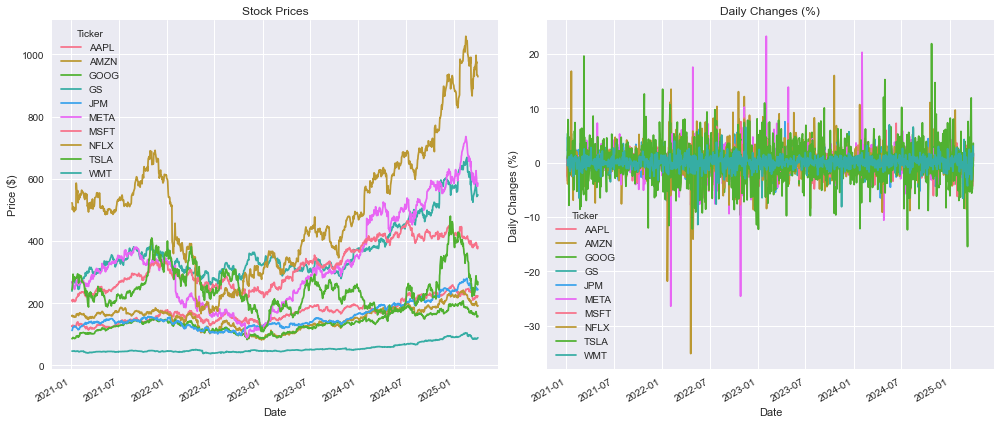

In [4]:
# Calculate daily changes
changes = cls_price_data.pct_change().dropna()
changes_percent = changes*100

# Plot the price and changes data
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
cls_price_data.plot(title='Stock Prices', ax=plt.gca())
plt.ylabel('Price ($)')

plt.subplot(1, 2, 2)
changes_percent.plot(title='Daily Changes (%)', ax=plt.gca())
plt.ylabel('Daily Changes (%)')
plt.tight_layout()
plt.show()

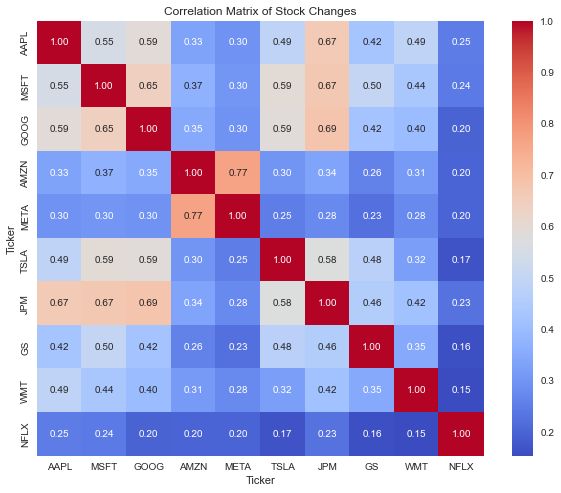

<Figure size 864x432 with 0 Axes>

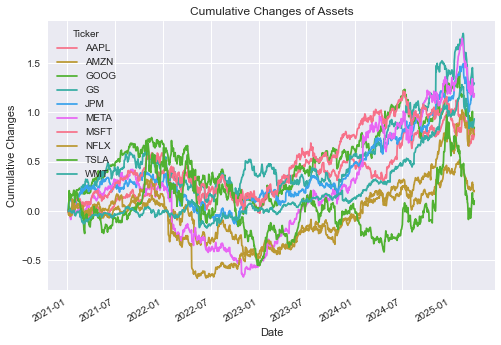

In [5]:
# Calculate averaged changes (annualized)
annual_changes = changes.mean() * 252  # 252 trading days/year

# Calculate covariance matrix (annualized)
cov_matrix = changes.cov() * 252

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = changes.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=tickers, yticklabels=tickers)
plt.title('Correlation Matrix of Stock Changes')
plt.show()

# Plot cumulative changes
cumulative_changes = (1 + changes).cumprod() - 1
plt.figure(figsize=(12, 6))
cumulative_changes.plot()
plt.title('Cumulative Changes of Assets')
plt.ylabel('Cumulative Changes')
plt.xlabel('Date')
plt.grid(True)
plt.show()

In [6]:
cov_matrix


Ticker,AAPL,AMZN,GOOG,GS,JPM,META,MSFT,NFLX,TSLA,WMT
Ticker,,,,,,,,,,
AAPL,0.071422,0.051624,0.048854,0.023786,0.019264,0.057643,0.046320,0.051097,0.079421,0.013423
AMZN,0.051624,0.122062,0.069554,0.034508,0.025700,0.091452,0.061039,0.079244,0.092887,0.017259
GOOG,0.048854,0.069554,0.095216,0.028603,0.022132,0.080200,0.055081,0.058751,0.075338,0.012358
GS,0.023786,0.034508,0.028603,0.070599,0.049272,0.035211,0.023259,0.031066,0.050457,0.010810
JPM,0.019264,0.025700,0.022132,0.049272,0.058315,0.026581,0.017415,0.024502,0.040729,0.009804
META,0.057643,0.091452,0.080200,0.035211,0.026581,0.194495,0.066096,0.094464,0.086979,0.014986
MSFT,0.046320,0.061039,0.055081,0.023259,0.017415,0.066096,0.067905,0.053783,0.066068,0.012024
NFLX,0.051097,0.079244,0.058751,0.031066,0.024502,0.094464,0.053783,0.202658,0.096224,0.014653
TSLA,0.079421,0.092887,0.075338,0.050457,0.040729,0.086979,0.066068,0.096224,0.369767,0.018966


In [7]:
def optimize_portfolio(expected_returns, cov_matrix, gamma=1.0, constraints=None):
    """
    Optimize portfolio weights using convex optimization
    
    Parameters:
    expected_returns : pd.Series - Expected returns for each asset
    cov_matrix : pd.DataFrame - Covariance matrix of returns
    gamma : float - Risk aversion parameter
    constraints : list - Additional CVXPY constraints
    
    Returns:
    dict - Optimal weights and portfolio metrics
    """
    n = len(expected_returns)
    weights = cp.Variable(n)
    
    # Default constraints
    if constraints is None:
        constraints = [
            cp.sum(weights) == 1,
            weights >= 0  # No short selling
        ]

    
    # Objective function: minimize risk - gamma*return
    objective = cp.Minimize(cp.quad_form(weights, cov_matrix.values) - 
                          gamma * expected_returns.values.T @ weights)
    
    # Solve problem
    problem = cp.Problem(objective, constraints)
    problem.solve()
    
    if problem.status != 'optimal':
        raise ValueError("Optimization failed with status:", problem.status)
    
    # Calculate portfolio metrics
    w = pd.Series(weights.value, index=expected_returns.index)
    portfolio_return = expected_returns.T @ w
    portfolio_volatility = np.sqrt(w.T @ cov_matrix @ w)
    
    return {
        'weights': w,
        'expected_return': portfolio_return,
        'volatility': portfolio_volatility,
        'sharpe_ratio': portfolio_return / portfolio_volatility
    }

Calculating efficient frontier...


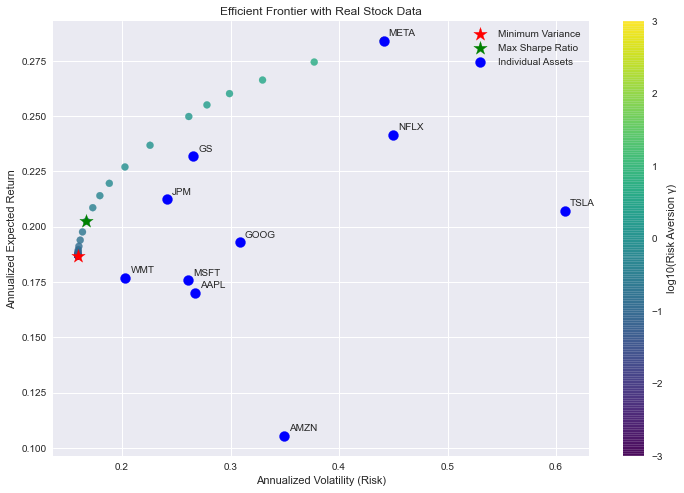

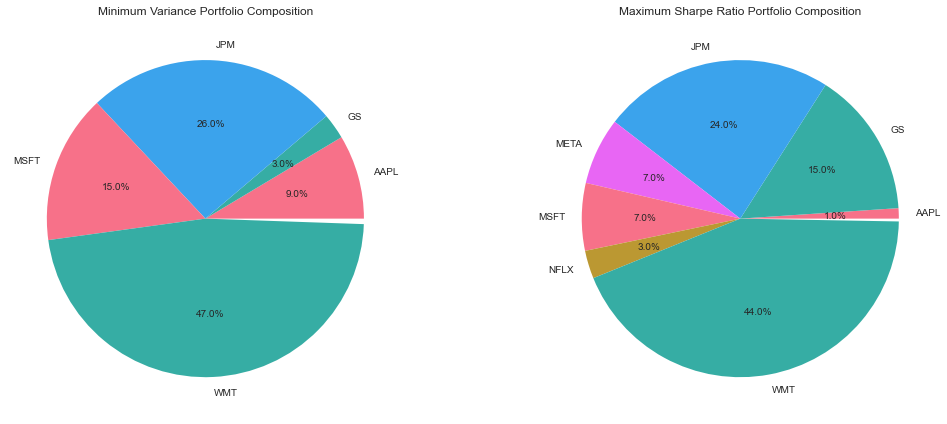

In [10]:
# Generate range of risk aversion parameters
gammas = np.logspace(-3, 3, 50)

# Store results
frontier = []

print("Calculating efficient frontier...")
for gamma in gammas:
    try:
        result = optimize_portfolio(annual_changes, cov_matrix, gamma)
        frontier.append({
            'gamma': gamma,
            'return': result['expected_return'],
            'volatility': result['volatility'],
            'weights': result['weights']
        })
    except ValueError as e:
        print(f"Skipping gamma={gamma:.4f}: {str(e)}")

# Convert to DataFrame
frontier_df = pd.DataFrame(frontier)

# Find key portfolios
min_vol_idx = frontier_df['volatility'].idxmin()
max_sharpe_idx = (frontier_df['return'] / frontier_df['volatility']).idxmax()

# Plot efficient frontier
plt.figure(figsize=(12, 8))
plt.scatter(frontier_df['volatility'], frontier_df['return'], 
            c=np.log10(frontier_df['gamma']), cmap='viridis', alpha=0.8)
plt.colorbar(label='log10(Risk Aversion γ)')
plt.xlabel('Annualized Volatility (Risk)')
plt.ylabel('Annualized Expected Return')
plt.title('Efficient Frontier with Real Stock Data')

# Highlight key portfolios
plt.scatter(frontier_df.loc[min_vol_idx, 'volatility'],
            frontier_df.loc[min_vol_idx, 'return'],
            s=200, marker='*', color='red', label='Minimum Variance')
plt.scatter(frontier_df.loc[max_sharpe_idx, 'volatility'],
            frontier_df.loc[max_sharpe_idx, 'return'],
            s=200, marker='*', color='green', label='Max Sharpe Ratio')

# Plot individual assets
plt.scatter(np.sqrt(np.diag(cov_matrix)), annual_changes,
            s=100, color='blue', marker='o', label='Individual Assets')

asset_vols = np.sqrt(np.diag(cov_matrix))           # annual volatility of each asset
asset_rets = annual_changes.values                  # annual return of each asset
asset_names = annual_changes.index                  # ticker symbols

for i, ticker in enumerate(asset_names):
    plt.annotate(ticker, (asset_vols[i], asset_rets[i]),
                 xytext=(5, 5), textcoords='offset points')
    
plt.grid(True)
plt.legend()
plt.show()

# Plot portfolio compositions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
# explode = [0.01]* len(ticker)

# Minimum volatility portfolio
min_vol_weights = frontier_df.loc[min_vol_idx, 'weights']
min_vol_weights[min_vol_weights < 0.01] = 0  # Filter small weights
min_vol_weights.plot(kind='pie', 
                     autopct= lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '', 
                     ax=ax1)
ax1.set_title('Minimum Variance Portfolio Composition')
ax1.set_ylabel('')

# Maximum Sharpe ratio portfolio
max_sharpe_weights = frontier_df.loc[max_sharpe_idx, 'weights']
max_sharpe_weights[max_sharpe_weights < 0.01] = 0  # Filter small weights
max_sharpe_weights.plot(kind='pie', 
                        autopct= lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '', 
                        ax=ax2)
ax2.set_title('Maximum Sharpe Ratio Portfolio Composition')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()